In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data.csv")
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [4]:
df.duplicated().sum()

6

In [5]:
df=df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
# X_resampled, y_resampled = smote.fit_resample(X, y)
# resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=["Type"])], axis=1)

In [9]:
# resampled_data.to_csv('balanced_migraine_data.csv', index=False)

In [10]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
X, y = smote_tomek.fit_resample(X, y)
resampled_df = pd.concat([X, y], axis=1)

In [11]:
df = pd.read_csv("balanced_migraine_data.csv")
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [12]:
df.duplicated().sum()

734

In [13]:
df = df.drop_duplicates()

In [14]:
df.isnull().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

In [15]:
df.shape

(953, 24)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, 0 to 1680
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          953 non-null    int64 
 1   Duration     953 non-null    int64 
 2   Frequency    953 non-null    int64 
 3   Location     953 non-null    int64 
 4   Character    953 non-null    int64 
 5   Intensity    953 non-null    int64 
 6   Nausea       953 non-null    int64 
 7   Vomit        953 non-null    int64 
 8   Phonophobia  953 non-null    int64 
 9   Photophobia  953 non-null    int64 
 10  Visual       953 non-null    int64 
 11  Sensory      953 non-null    int64 
 12  Dysphasia    953 non-null    int64 
 13  Dysarthria   953 non-null    int64 
 14  Vertigo      953 non-null    int64 
 15  Tinnitus     953 non-null    int64 
 16  Hypoacusis   953 non-null    int64 
 17  Diplopia     953 non-null    int64 
 18  Defect       953 non-null    int64 
 19  Ataxia       953 non-null    int6

In [17]:
df["Visual"].value_counts()

Visual
2    298
0    272
1    245
3    126
4     12
Name: count, dtype: int64

In [18]:
categorical_columns = ["Location", "Character", "Nausea", "Vomit", "Phonophobia", "Photophobia", "Sensory", "Dysphasia", "Dysarthria", "Vertigo", "Tinnitus", "Hypoacusis", "Diplopia", "Defect", "Ataxia"]
classification_data = df[categorical_columns]
classification_data.describe()

,Location,Character,Nausea,Vomit,Phonophobia,Photophobia,Sensory,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.0
mean,0.925498,0.946485,0.933893,0.229801,0.878279,0.894019,0.225603,0.038825,0.001049,0.176285,0.059811,0.014690,0.004197,0.014690,0.0
std,0.409589,0.437562,0.248600,0.420925,0.327135,0.307975,0.517037,0.193279,0.032393,0.381263,0.237261,0.120374,0.064684,0.120374,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [19]:
df.corr(numeric_only=True, )

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
Age,1.000000,0.024773,0.125584,0.228439,0.212603,0.257531,-0.058916,0.028135,-0.257742,-0.146348,...,-0.029698,-0.005325,-0.088632,0.009113,0.037807,0.036002,NaN,0.002777,-0.008061,0.006825
Duration,0.024773,1.000000,0.172893,0.019114,0.011838,0.052883,-0.091033,-0.063744,0.029542,0.016405,...,-0.024927,0.073043,-0.054896,-0.031604,-0.003553,0.080547,NaN,-0.055038,0.089206,0.153488
Frequency,0.125584,0.172893,1.000000,-0.064319,-0.052576,0.051603,0.087751,0.171973,0.117967,0.083340,...,-0.003129,-0.134398,-0.075244,-0.073090,-0.047751,-0.078663,NaN,-0.073203,-0.037380,-0.009551
Location,0.228439,0.019114,-0.064319,1.000000,0.903775,0.765296,-0.048420,0.081129,-0.326454,-0.270840,...,0.005898,0.037105,0.045902,0.022222,0.011815,0.022222,NaN,0.019666,0.011815,0.016183
Character,0.212603,0.011838,-0.052576,0.903775,1.000000,0.749208,-0.061526,0.089653,-0.449162,-0.439669,...,0.003966,0.018830,0.030864,0.014942,0.007944,0.014942,NaN,0.013223,0.007944,-0.008954
Intensity,0.257531,0.052883,0.051603,0.765296,0.749208,1.000000,-0.082668,0.082716,-0.254749,-0.235606,...,-0.009605,0.073531,-0.040033,0.023685,0.044427,0.083556,NaN,0.073946,0.044427,-0.100867
Nausea,-0.058916,-0.091033,0.087751,-0.048420,-0.061526,-0.082668,1.000000,0.145328,0.391770,0.525786,...,0.008623,-0.054238,0.049297,0.032487,0.017273,0.032487,NaN,0.028751,0.017273,-0.078401
Vomit,0.028135,-0.063744,0.171973,0.081129,0.089653,0.082716,0.145328,1.000000,0.020268,0.026009,...,0.059335,-0.121786,-0.053627,-0.045966,0.003117,-0.025234,NaN,0.011026,0.003117,-0.059347
Phonophobia,-0.257742,0.029542,0.117967,-0.326454,-0.449162,-0.254749,0.391770,0.020268,1.000000,0.799744,...,0.012066,-0.029905,0.093897,0.045457,0.024169,0.045457,NaN,0.040229,0.024169,0.032086
Photophobia,-0.146348,0.016405,0.083340,-0.270840,-0.439669,-0.235606,0.525786,0.026009,0.799744,1.000000,...,0.011159,-0.028584,0.086841,0.042041,0.022353,0.042041,NaN,0.037206,0.022353,0.048486


Univariate Analysis

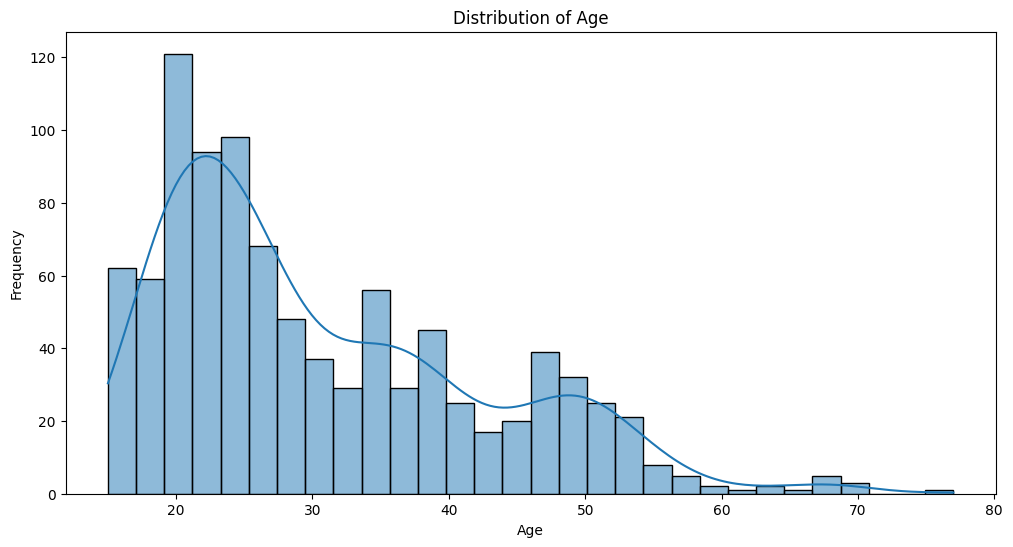

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

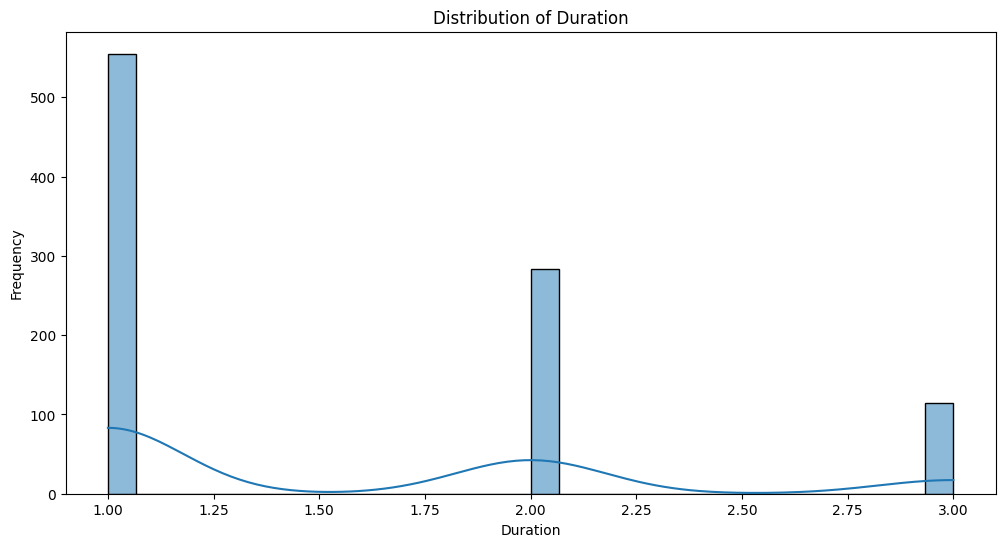

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Duration'], kde=True, bins=30)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()
# only 1, 2 and 3

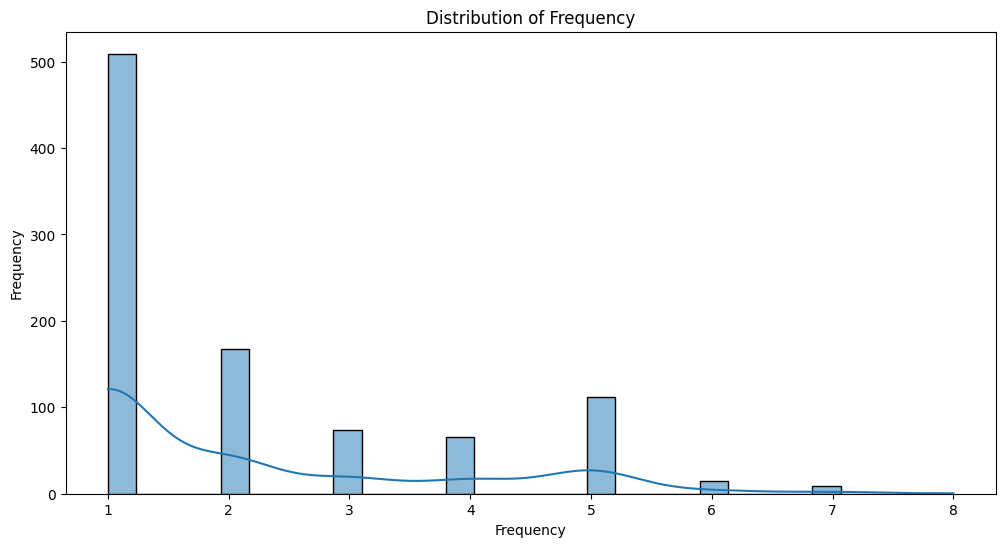

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Frequency'], kde=True, bins=30)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.show()

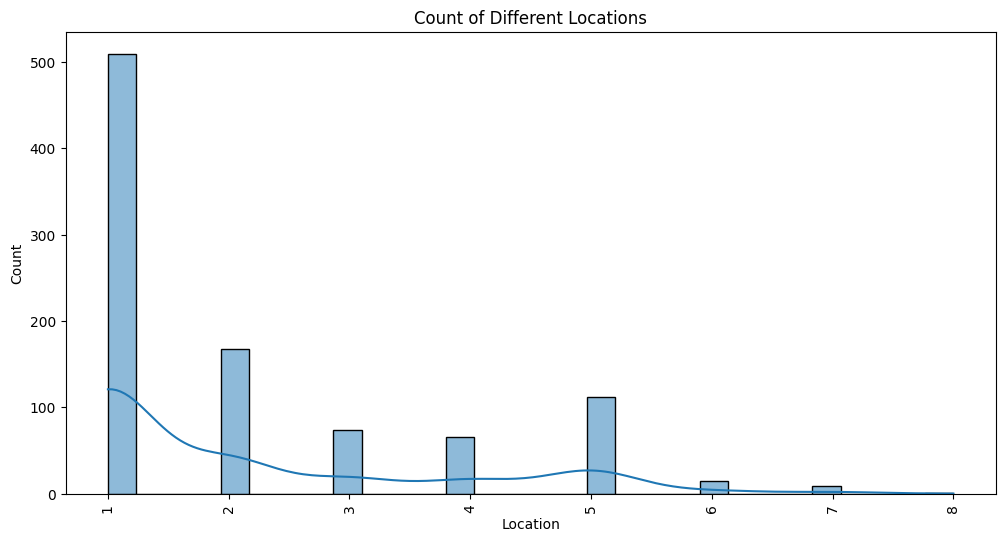

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Frequency'], kde=True, bins=30)
plt.title('Count of Different Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [24]:
df["Type"].value_counts()

Type
Typical aura with migraine       241
Migraine without aura            155
Other                            141
Basilar-type aura                122
Typical aura without migraine    118
Familial hemiplegic migraine      97
Sporadic hemiplegic migraine      79
Name: count, dtype: int64

<Axes: >

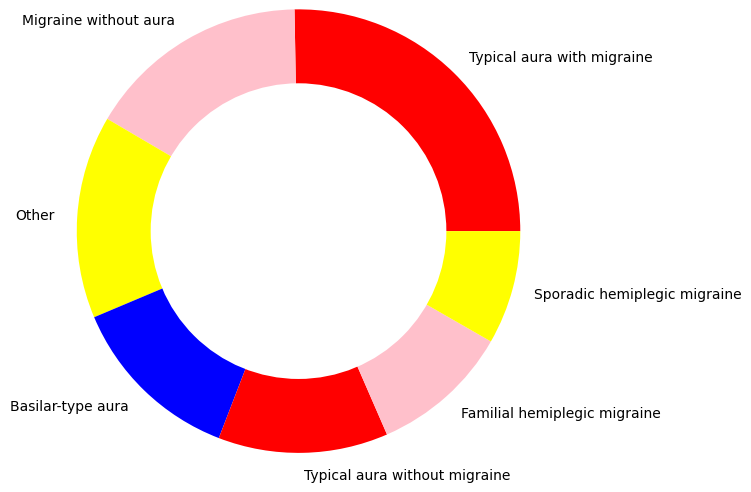

In [25]:
# Class distribution
x = df["Type"].value_counts()
y = ["Typical aura with migraine", "Migraine without aura", "Other", "Basilar-type aura", "Typical aura without migraine", "Familial hemiplegic migraine", "Sporadic hemiplegic migraine"]
plt.pie(x, labels=y, radius=1.5, colors=["red", 'pink', "yellow", "blue"])
circle = plt.Circle(xy=(0,0), radius=1, facecolor="white")
plt.gca().add_artist(circle)
plt.gca()

Bivariate Analysis

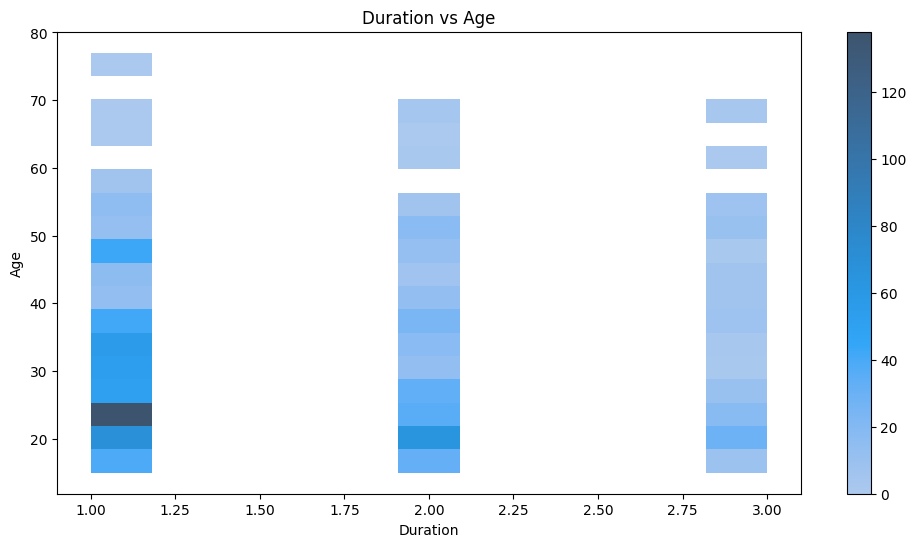

In [26]:
# Duration vs Age

plt.figure(figsize=(12, 6))
sns.histplot(x=df['Duration'], y=df['Age'], cbar="winter")
plt.title('Duration vs Age')
plt.xlabel('Duration')
plt.ylabel('Age')
plt.show()

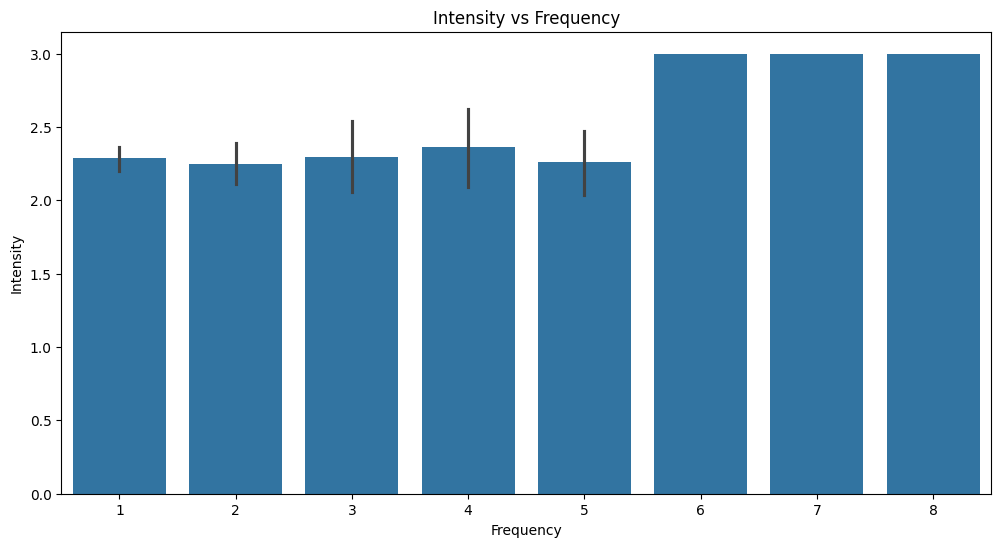

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Frequency'], y=df['Intensity'])
plt.title('Intensity vs Frequency')
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.show()

In [28]:
df["Character"] = df["Character"].astype("category")

In [29]:
print(df['Character'].dtype)
print(df['Character'].unique())

category
[1, 2, 0]
Categories (3, int64): [0, 1, 2]


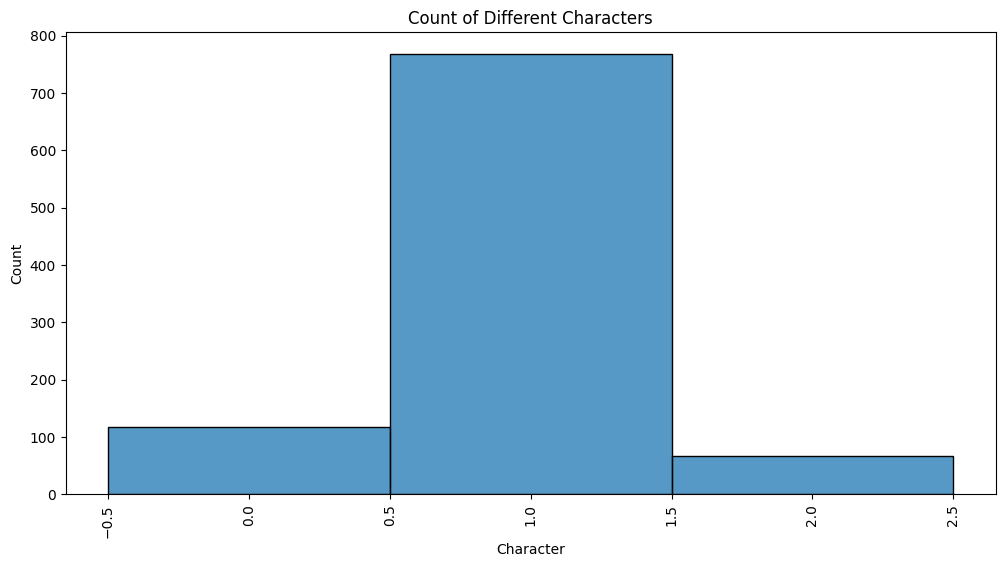

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Character'])
plt.title('Count of Different Characters')
plt.xlabel('Character')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x1200 with 0 Axes>

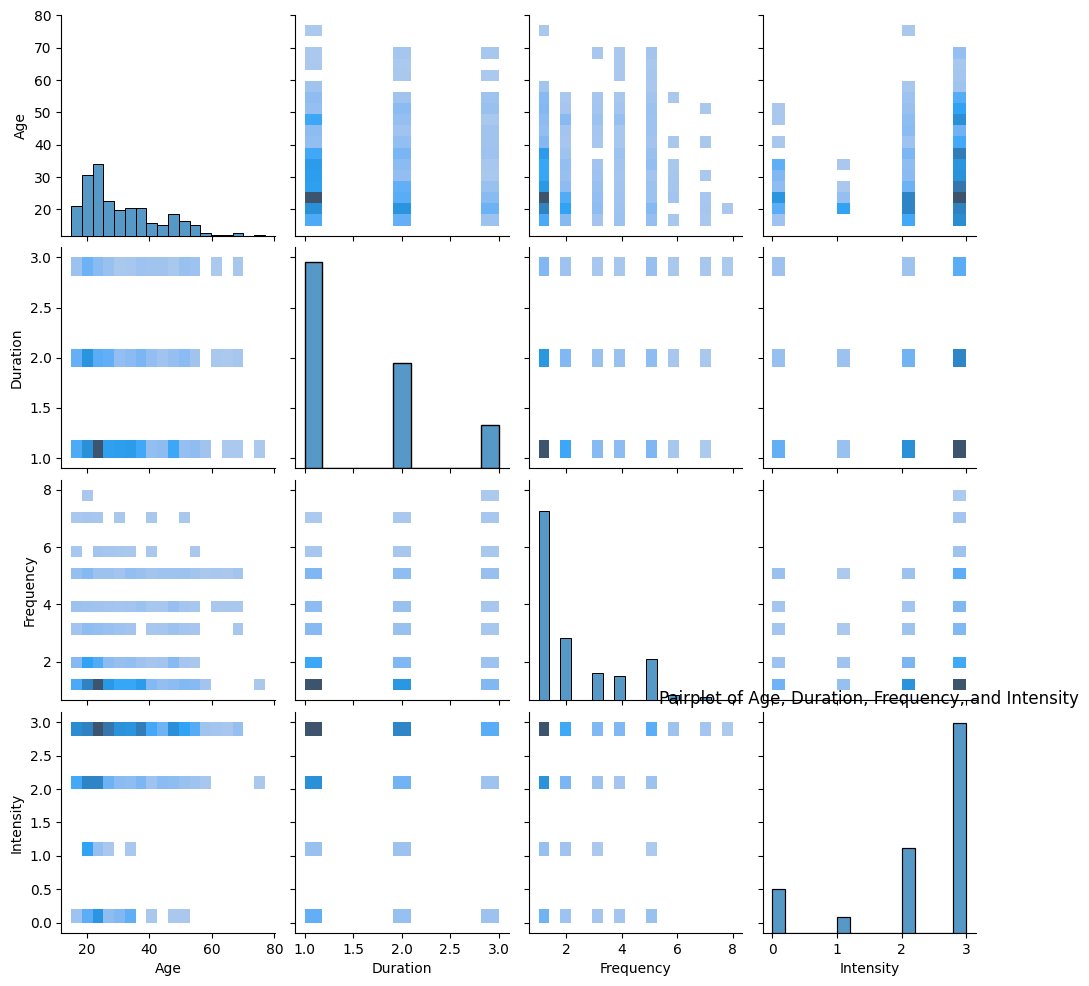

In [31]:
plt.figure(figsize=(12, 12))
sns.pairplot(df[['Age', 'Duration', 'Frequency', 'Intensity']], kind="hist")
plt.title('Pairplot of Age, Duration, Frequency, and Intensity')
plt.show()

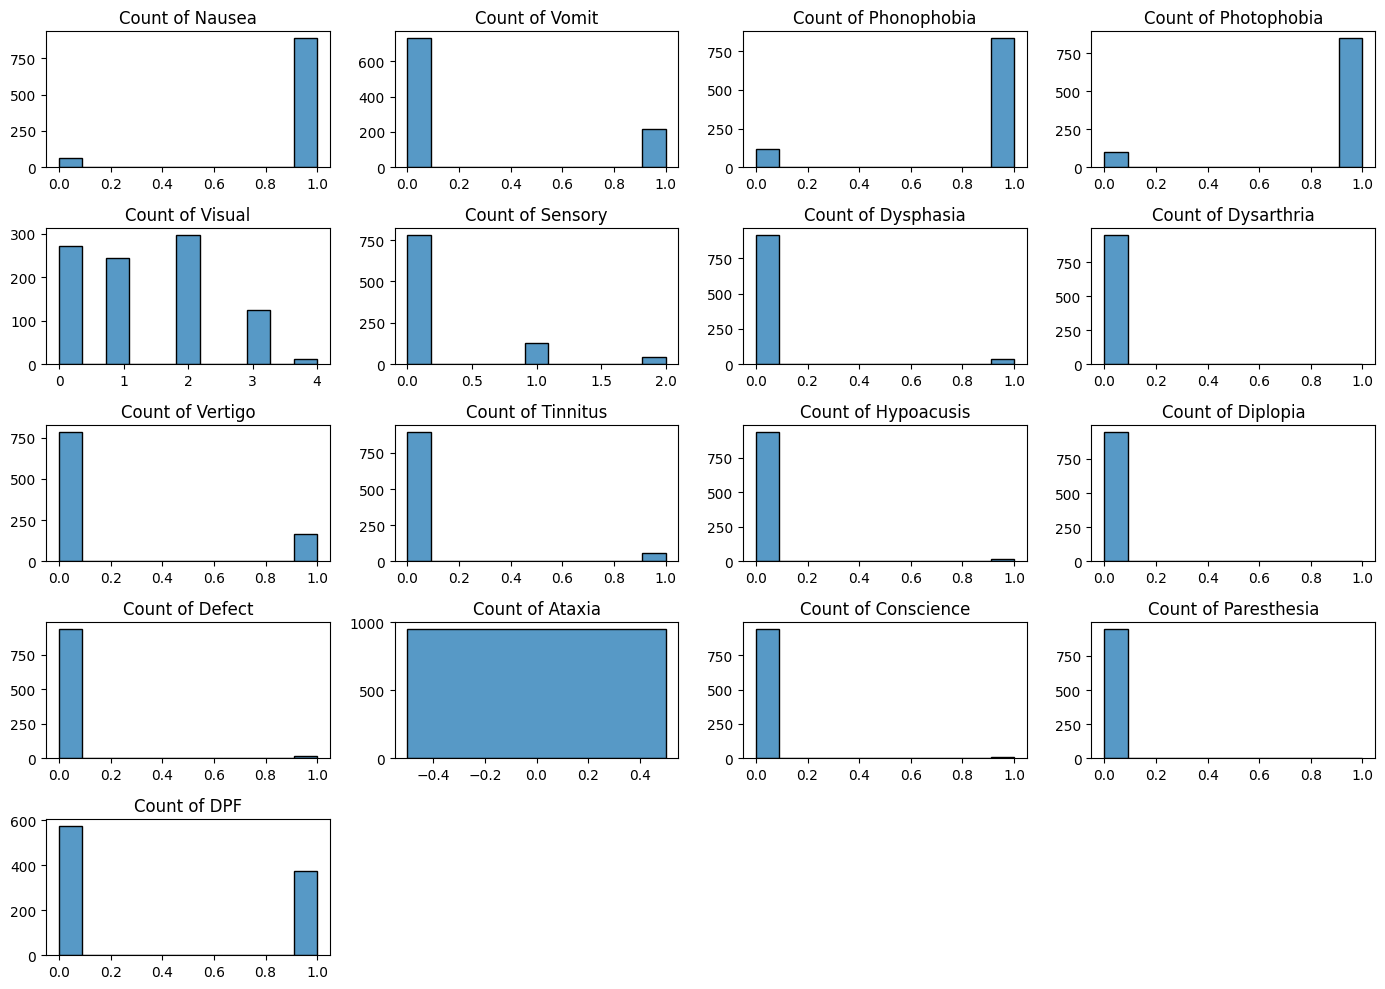

In [32]:
symptom_columns = ['Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory', 
                   'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis', 'Diplopia', 
                   'Defect', 'Ataxia', 'Conscience', 'Paresthesia', "DPF"]

plt.figure(figsize=(14, 10))
for i, column in enumerate(symptom_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[column])
    plt.title(f'Count of {column}')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

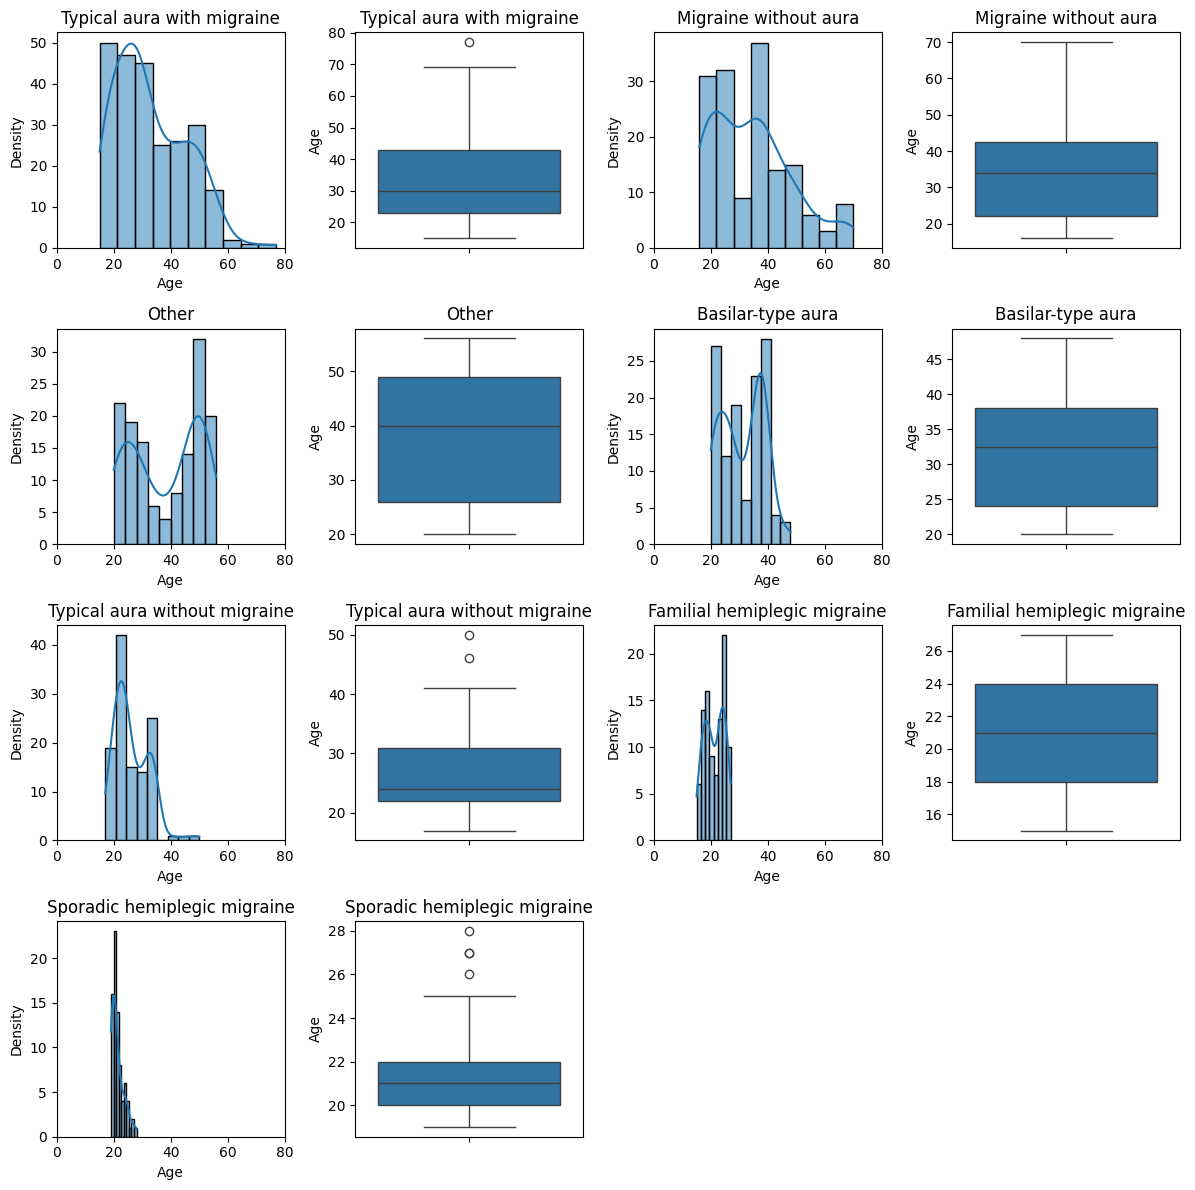

In [33]:
y = ["Typical aura with migraine", "Migraine without aura", "Other", "Basilar-type aura", "Typical aura without migraine", "Familial hemiplegic migraine", "Sporadic hemiplegic migraine"]
j = 1
plt.figure(figsize=(12,12))
for i in y:
    plt.subplot(4, 4, j)
    j=j+1
    x = df[df["Type"]==i]["Age"]
    sns.histplot(x, kde=True)
    plt.xlim(0,80)
    plt.ylabel("Density")
    plt.title(i)

    plt.subplot(4, 4, j)
    j=j+1
    sns.boxplot(x)
    plt.title(i)
plt.tight_layout()
plt.show()


In [34]:
df.shape

(953, 24)

In [35]:
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).all(axis=1)
print(outliers)

0       False
1       False
2       False
3       False
4       False
        ...  
1663    False
1671    False
1673    False
1675    False
1680    False
Length: 953, dtype: bool


In [36]:
df.to_csv("migraine.csv", index=False)

In [37]:
df.shape

(953, 24)

In [39]:
df1 = pd.read_csv("data.csv")

<Axes: >

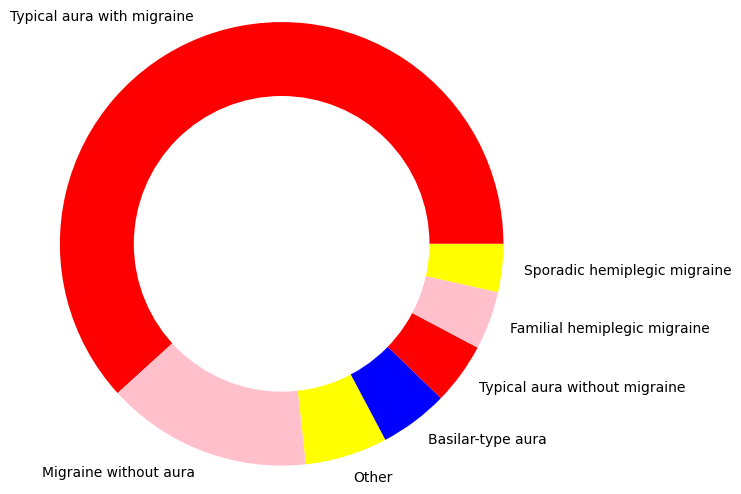

In [41]:
x = df1["Type"].value_counts()
y = ["Typical aura with migraine", "Migraine without aura", "Other", "Basilar-type aura", "Typical aura without migraine", "Familial hemiplegic migraine", "Sporadic hemiplegic migraine"]
plt.pie(x, labels=y, radius=1.5, colors=["red", 'pink', "yellow", "blue"])
circle = plt.Circle(xy=(0,0), radius=1, facecolor="white")
plt.gca().add_artist(circle)
plt.gca()